# 중간고사 요약

## import

In [3]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress_grid

# 크롤링
import os
import sys
import datetime
import time
import json
import urllib.request

import re
from bs4 import BeautifulSoup 

import urllib3
import requests

# 데이터
import seaborn as sns
# from sklearn.datasets import load_boston, make_regression, load_breast_cancer, fetch_california_housing
# iris = sns.load_dataset('iris')
# titanic = sns.load_dataset("titanic")
# boston =  load_boston()
# b_cancer = load_breast_cancer()

# 통계 분석
from scipy import stats
from scipy.stats import chisquare, levene, ttest_ind, ttest_rel # 이건 선택에 따라
from statsmodels.formula.api import ols, glm
from statsmodels.stats.anova import anova_lm

# 머신 러닝
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# 버전 오류 출력 X
import warnings
warnings.filterwarnings(action='ignore')

### * 과제1.1 : 성별, 혈액형 별 몸무게의 평균

In [1]:
## 1) .txt 읽기
fd = open("studentlist.txt", encoding="cp949")
fd.readline() # 헤딩 
lines= fd.readlines()

## 2) 필드 분할, 가공
Table=[] # 전체 레코드를 담은 테이블 

for line in lines :  # 한 줄 씩  line 변수에 담아서    
    fields= line.split(",") # , 를 기준으로 나눈다. -> fields라는 list가 만들어진다.
    # name,sex,age,grade,absence,bloodtype,height,weight,dept
    #  0    1   2    3    4        5         6     7      8

    fields[2]= int(fields[2])  # 나이를 숫자로 바꿔 넣기
    fields[6]= float(fields[6])  # 키를 숫자로 바꿔 넣기
    fields[7] = float(fields[7]) # 몸무게도 
    fields[8]= fields[8].strip()
          
    Table.append(fields)  #레코드를 테이블에 추가 

## 3) 성별, 혈액형 별 몸무게의 평균 구하기
w_table={Table[0][1] : {Table[0][5] : [0, 0]}}  # 집계 테이블 : { 성별 : { 혈액형 : [합계, 도수] } }

for rec in Table :
    sex=rec[1]
    bloodtype=rec[5]
    weight=rec[7]
    if sex in w_table:  # 성별이 있는지
        if bloodtype in w_table[sex] :  # 혈액형이 있는지
            w_table[sex][bloodtype] = [w_table[sex][bloodtype][0]+weight, w_table[sex][bloodtype][1]+ 1]  # 몸무게 합계, 갯수 
        else :
            w_table[sex][bloodtype] = [weight, 1]  # 몸무게, 갯수
    else:
        w_table[sex] = { bloodtype : [weight, 1] }  # { 혈액형 : [합계, 도수] } 

for sex, values in w_table.items():
    for bloodtype, value in w_table[sex].items() :
        print(sex, bloodtype, value[0]/value[1], sep=', ')


남자, O, 65.1
남자, B, 68.95
남자, AB, 80.75
남자, A, 58.75
여자, AB, 53.0
여자, A, 52.25
여자, O, 50.13333333333333
여자, B, 45.2


## csv 읽기

In [ ]:
std_df = pd.read_csv("studentlist.csv", encoding="cp949")

## pandas

In [4]:
# numpy -> pandas
df = pd.DataFrame(np.random.randn(6, 4), index=np.arange(6), columns=list("ABCD"))
print(df)

# 숫자에 의한 참조
print( df.iloc[1:3, 0:3] )

# label에 의한 참조
print( df.loc[1:3, ["A","B"]] )

# 값에 의한 참조 : boolean indexing , 조건에 맞는 row를 선택
print( df[ df["A"] < 0 ] )

# isin : 포함 조건
print( df.loc[ df["B"].isin([0, 1]), ["A", "B", "C"] ] )

          A         B         C         D
0  0.512109  1.718466 -1.518152 -0.198456
1 -0.959589  0.349876 -0.411440 -0.822834
2  0.314792 -0.950794  0.042545 -1.681817
3  1.924633  2.376449 -0.918245 -0.428290
4 -0.303539 -1.440994 -0.441735  0.953474
5  0.486681 -0.064954 -0.959106 -0.198576
          A         B         C
1 -0.959589  0.349876 -0.411440
2  0.314792 -0.950794  0.042545
          A         B
1 -0.959589  0.349876
2  0.314792 -0.950794
3  1.924633  2.376449
          A         B         C         D
1 -0.959589  0.349876 -0.411440 -0.822834
4 -0.303539 -1.440994 -0.441735  0.953474
Empty DataFrame
Columns: [A, B, C]
Index: []


### 과제 2.5 : studentlist의 혈액형 별 도수를 bar 차트로 그리시오

In [ ]:
df = pd.read_csv("studentlist.csv", encoding="cp949")
A = df.groupby("bloodtype").size()
plt.bar(A.index, A.values)

## 시각화
- matplotlib.pyplot
    - `titanic.survived.value_counts().plot(kind='bar')`
    - `titanic.survived.value_counts().plot(kind='pie')`
- sns.countplot
    - `sns.countplot(x='survived', data=titanic)`

<Axes: >

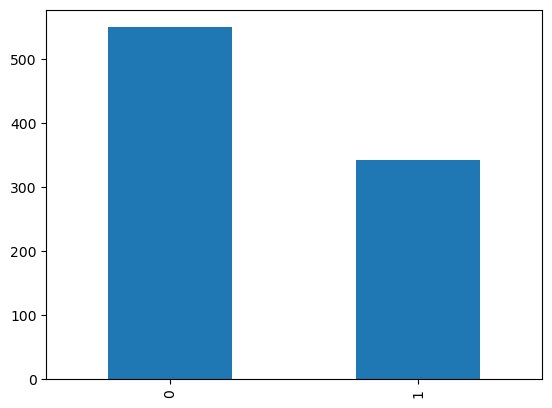

In [5]:
# 타이타닉 데이터
titanic = sns.load_dataset("titanic")

# bar
titanic.survived.value_counts().plot(kind='bar')

<Axes: ylabel='survived'>

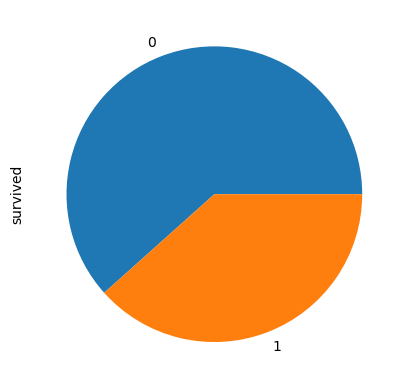

In [6]:
# pie
titanic.survived.value_counts().plot(kind='pie')

<Axes: xlabel='survived', ylabel='count'>

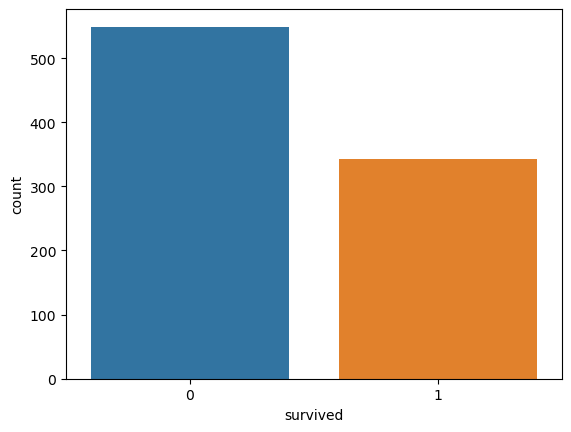

In [7]:
sns.countplot(x='survived', data=titanic)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f87e00b74f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87e00b7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87e00b7250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87e00b7e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87f88c8130>],
 'means': []}

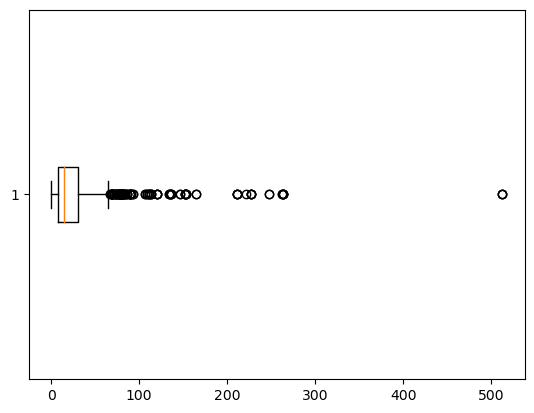

In [8]:
# quartile, IQR 관련 시각화
plt.boxplot(titanic.fare, vert=False)

# 관계 분석
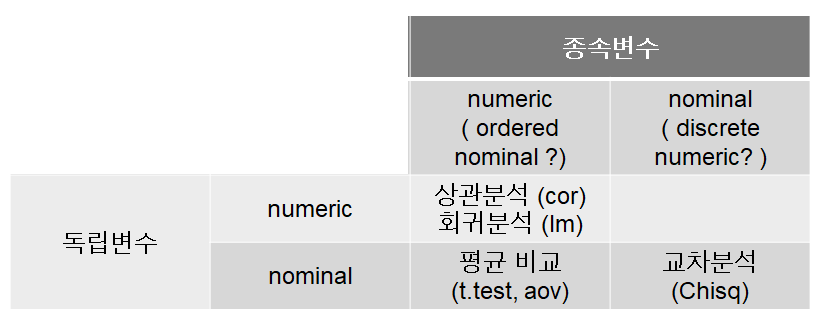

## nominal - nominal : 교차분석

### 차이의 통계적 유의성
- 통계적 유의성 (= 모집단에서도 그럴 것인가 = 지금 샘플의 결과에서의 차이가 통계적으로 유의미한 차이인가)
- `chi2_contingency(crosstab)`
- pvalue < 0.05 이면 (남녀 생존율이) 통계적으로 유의미한 차이가 있다.

### 과제1 : class별 생존자 수를 비교하고 (시각화포함), 통계적으로 유의한 차이인지 분석하시오

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119


<Axes: xlabel='class'>

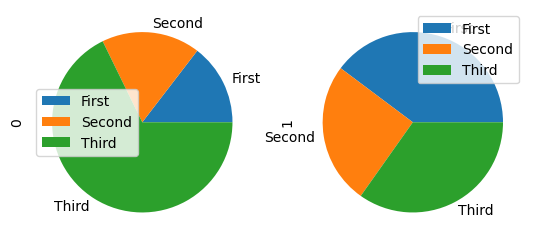

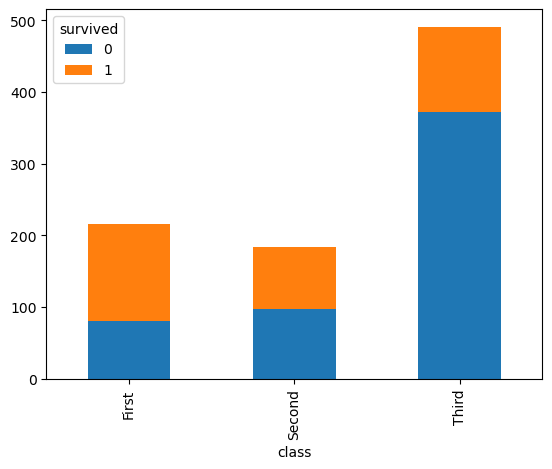

In [9]:
# class는 예약어라서 titanic.class 불가능 -> titanic["class"]
ct2=pd.crosstab(titanic["class"], titanic.survived)
print(ct2)  # 숫자
stats.chi2_contingency(ct2)

ct2.plot.pie(subplots=True)  # 시각화
ct2.plot.bar(stacked=True)

# pvalue < 0.05 이므로 class에 따라 생존자 수가 일정하지 않다
# 따라서 class별 생존자 수가 통계적으로 유의미한 차이가 있다

## nominal-numeric : 평균 비교
- nominal data value group (독립변수) 에 따라 numeric value (종속변수) 의 mean이 다른가?
- 독립변수 -> 종속변수
- `df.groupby (독립변수).종속변수.mean()`
- `sns.boxplot (x=독립변수, y=종속변수, data= df )`

In [10]:
# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean()

# 값이 3종 이상인 독립변수
titanic.groupby('class').fare.mean()

# mean 외에도 가능 
titanic.groupby('class').fare.median()

# 평균 비교
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ttest_indResult(statistic=-5.077499013458909, pvalue=5.388057409693902e-07)


<Axes: xlabel='sex', ylabel='fare'>

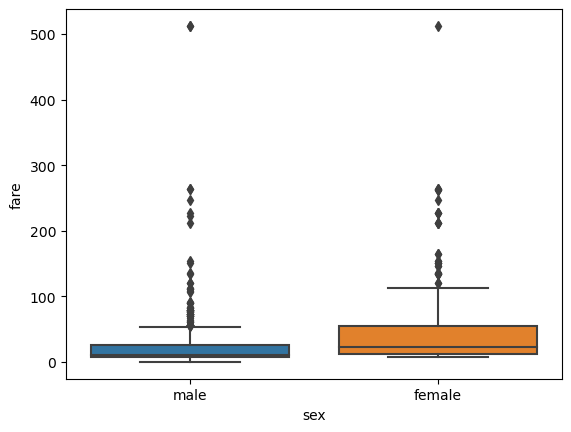

In [11]:
## 성별과 요금에 따른 통계적 유의성
male= titanic[titanic.sex=="male"]
female= titanic[titanic.sex=="female"]
levene(male.fare,female.fare)
print( ttest_ind(male.fare, female.fare, equal_var=False) )
# 성별에 따른 요금의 차이가 통계적 유의성이 있다. (=통계적으로 유의미한 수준의 차이가 있다)

# 시각화
sns.boxplot(x='sex', y='fare', data=titanic)
# sns.boxplot(x='sex', y='fare', hue='class', data=titanic)

### one way anova
- `m = ols ('종속변수~독립변수', df).fit()` : 모델 생성
- `anova_lm(m)` : 모델에 대한 정보 조회
- 데이터분석에서 모델 : 간단히 데이터 또는 데이터 간의 관계를 설명하는 도구

embark_town
Cherbourg      30.814769
Queenstown     28.089286
Southampton    29.445397
Name: age, dtype: float64
                df         sum_sq     mean_sq        F    PR(>F)
embark_town    2.0     267.719790  133.859895  0.63664  0.529369
Residual     709.0  149074.349191  210.260013      NaN       NaN


<Axes: xlabel='embark_town', ylabel='age'>

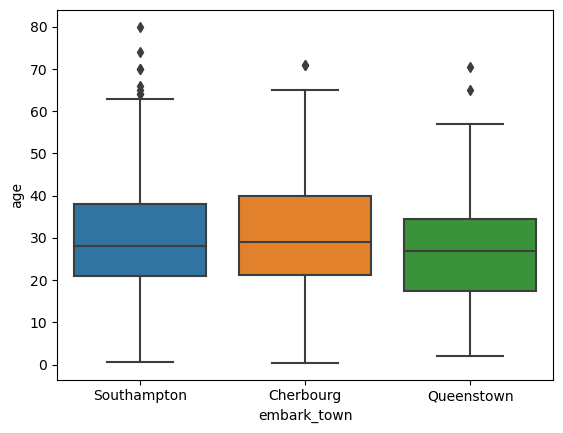

In [12]:
## 출발도시에 따라 탑승객 연령의 차이
## 출발도시와 탑승객의 총계적 유의성
print(titanic.groupby('embark_town').age.mean())

model = ols('age~embark_town', titanic).fit()
print( anova_lm(model) )
# pclass PR(>F)의 값이 0.05보다 크므로, 통계적으로 유의미한 차이가 없다

sns.boxplot(x='embark_town', y='age', data=titanic)

## numeric-numeric (상관분석)
- 상관관계 : 같이 증가, 같이 감소 (선형적 상관관계)
- 독립변수 -> 종속 변수 같은 순서가 없음
- 데이터를 봐서는 상관관계를 알기 어려움, 시각화 필요
- 상관 계수

In [13]:
# 모든 numeric변수에 대해 상관계수 구하기 (int 인 nominal포함)
## 상관계수구하기: df.corr() 
titanic.corr()

# 예: 0.8, 0.96 -> 상관관계가 높음 -> titanic 데이터에서는 높은 상관계수가 없음

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


- 상관분석 : 상관도가 높은 변수 pair를 찾아내기 -> 상관관계가 높은 변수가 없음
    - 예: 나이가 많을수록 사망률이 높음 -> 상관계수가 1에 가까움
- 위의 table 도 눈에 안들어오니 시각화 필요

<Axes: >

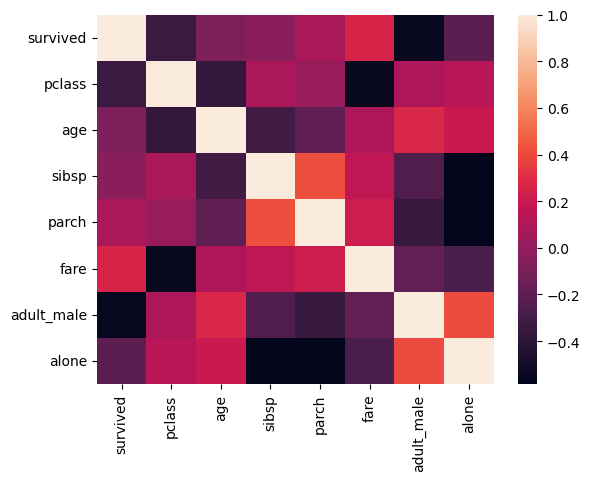

In [14]:
sns.heatmap(titanic.corr())

### 스피어만 상관계수
- 기본은 pearson : 선형관계 (값의 크기 자체가 의미가 있는 numeric : 곱하기 나누기가 의미를 갖는 숫자)
- 수치형 변수 종류 (3가지)
    - 순서만 의미있는 수치 : 학력 (고졸, 대졸, 대학원졸.. )
    - +/- 가 가능한 수치 : 섭씨온도, 지능지수
    - */ / 가 의미있는 수치 : 중량
- spearman: 값의 크기 대신 순위로 계산 (순서가 있는 nominal 데이터)

#### 주의점
- 상관계수의 해석이 주관적임(다음 같은 기준이 있긴 하나..)
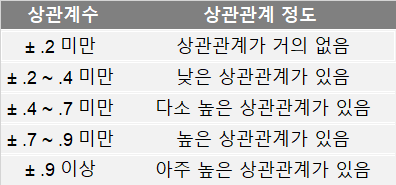

- 특히, 개별 관측치에 속한 2변수 (예, 키-몸무게) 가 아닌, 상이한 2개의 통계 데이터(연도 별 키의 통계, 연도 별 몸무게의 통계) 의 상관관계는 큰 의미가 없음
- 30개 이상의 관측치(레코드)가 있어야 의미가 있다. t-test에서도 마찬가지.. 

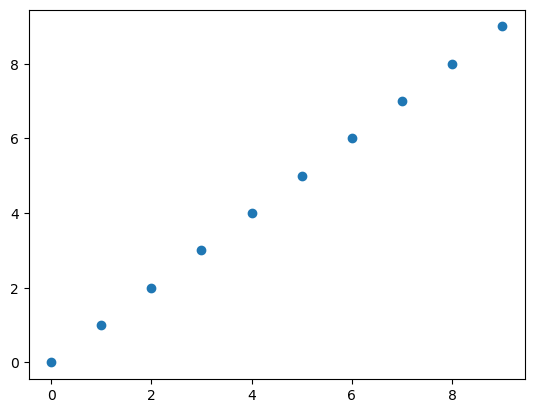

In [15]:
x=np.arange(0,10)
y1=x
stats.pearsonr(x,y1)  # 상관계수(statistic) = 1
plt.scatter(x,y1)

### numeric-numeric (회귀분석)
- 상관관계 : 2 변수가 같이 증가, 같이 감소 (선형적 상관관계, 직선에 얼마나 몰려있는지)
- 회귀분석 : 독립변수 -> 종속변수 선형적 상관관계의 정도(기울기)까지 분석
- 단순 선형회귀 : 하나의 독립변수 -> 하나의 종속변수
- 모델 생성 : `모델=ols( '종속변수~독립변수', data=데이터).fit()`
- 모델 정보 조회 : `모델.summary()`, `모델.params`

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<Axes: >

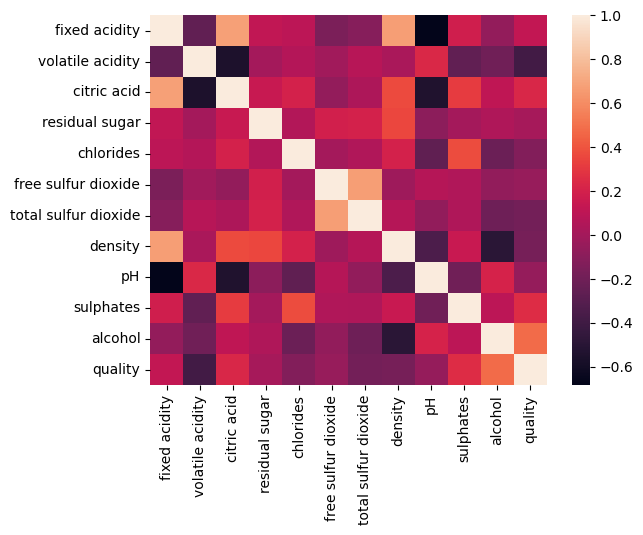

In [17]:
## red wine 데이터("winequaility-red.csv")에서 quality 변수와 가장 상관관계가 높은 변수를 찾으시오. 시각화, 과정 포함
# red wine 읽어오기
red_df= pd.read_csv("winequality-red.csv", sep=";")
print(red_df.head())

print(red_df.corr().quality)

sns.heatmap(red_df.corr())
# quality 변수는 alcohol 변수와 가장 상관관계가 높다

In [18]:
# white wine 읽어 오기, column 추가 및 합치기 
white_df= pd.read_csv("winequality-white.csv", sep=";")
white_df.insert(0, column='type', value='white')
wine=pd.concat([red_df, white_df]); wine
# 아래로 값을 더함. type이 none인 경우 red wines, type white인 경우 white wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [19]:
# 선형 회귀
m1 = ols('quality~alcohol', data=wine).fit()
print(m1.summary())
# 분석을 통해 회귀 계수를 찾음 -> coef = 0.3253

print(m1.params)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.50e-312
Time:                        18:01:53   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.0

<Axes: xlabel='alcohol', ylabel='quality'>

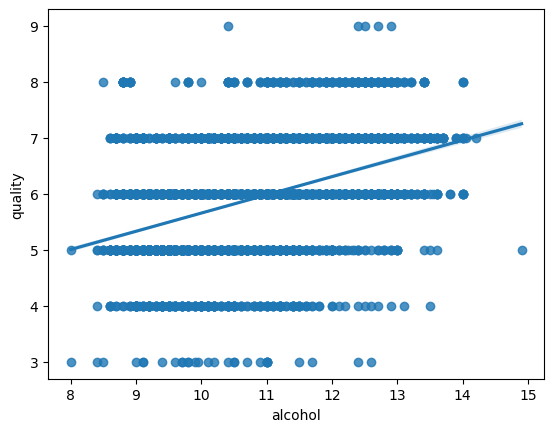

In [20]:
# 모델 시각화
sns.regplot(x="alcohol", y="quality", data=wine)

### 모델과 예측
- 모델 : 데이터를 설명하는 단순한 툴 (여기서는 1차함수의 절편, 기울기 => linear model)
- 모델을 이용해서 예측을 할 수 있음

### 중선형 회귀
- 중선형회귀 : 독립변수가 여러 개 일때
- 모델 생성 : 모델=ols('종속변수~독립변수1+독립변수2+ ... ', data=데이터).fit()

In [21]:
## 단순 선형 회귀 모델과 예측
red_df= pd.read_csv("winequality-red.csv", sep=";")
red_df.head()
m1 = ols('quality~alcohol', data=wine[:3000]).fit()  # 모델 생성 = 모델링 = 학습
m1.predict(wine[3000:].alcohol)  # 3000번 이후를 예측

1401    5.393155
1402    6.016788
1403    5.947495
1404    6.190020
1405    5.704971
          ...   
4893    6.051434
4894    5.497093
4895    5.427801
4896    6.605775
4897    6.259312
Length: 3497, dtype: float64

In [ ]:
## 중선형 회귀 모델과 예측
wine.columns = [c.replace(' ', '_') for c in wine.columns]  # 공백있는 column 이름 처리

# 모델링
model = ols ('quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine).fit()
print(model.summary())  # coef = 회귀 계수

# 시각화
fig = plot_partregress_grid(model)
fig.tight_layout(pad=1)

# 예측
model.predict(wine[5000:][["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"]])  # 예측

# 머신러닝

In [ ]:
# sklearn 데이터로부터 Dataframe 가공
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names); df

In [ ]:
# housing.data 독립변수
# housing.target 종속변수
df['PRICE'] = housing.target; df

In [ ]:
## 1) 데이터 가공
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['PRICE'] = housing.target


## 2) 모델 training
## 2.1) X, Y 분할하기
Y = df['MedInc']
X = df.drop(['MedInc'], axis=1, inplace=False)

## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


## 3) 선형 회귀 분석
## 3.1) 모델 생성
lr = LinearRegression()

## 3.2) 모델 훈련
lr.fit(X_train, Y_train)

## 3.3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


## 4) 결과 분석
## 4.1) regression 모델 정보
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
coef = pd.Series(data=lr.coef_, index=X.columns)
print(coef)
print()

## 5) 성능 분석
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))  # 오차가 0.734(rmse) 정도 됨

print('상관계수 : {0:.3f}' .format(stats.pearsonr(Y_test, Y_predict).statistic))

### 자동차 연비(mpg) 예측
- 분석하지 않을 변수 제외하기
    - 예: 자동차 연비
        - car_name : string
        - origin : 명목변수(크기가 의미가 없음)
        - `data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)`

In [ ]:
## 1) 데이터 가공
import numpy as np
import pandas as pd 

# 읽어오기
data_df1 = pd.read_csv('auto-mpg.csv', header=0, engine='python')

# 분석하지 않을 변수 제외하기
data_df1 = data_df1.drop(['car_name', 'origin'], axis=1, inplace=False)

# horsepower 이상치 제거 후 int 변환
data_df1.horsepower=data_df1.horsepower.replace('?', np.NaN)
data_df1 = data_df1.dropna()
data_df1.horsepower= data_df1.horsepower.astype('int')


# horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 확인
data_df1['h10']= data_df1['horsepower']/10
X = data_df1.drop(['horsepower'], axis=1, inplace=False)


## 2) 모델 training
from sklearn.model_selection import train_test_split

## 2.1) X, Y 분할하기
Y = X['mpg']
X = X.drop(['mpg'], axis=1, inplace=False)


## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


## 3) 선형 회귀 분석
from sklearn.linear_model import LinearRegression

## 3.1) 모델 생성
lr = LinearRegression()

## 3.2) 모델 훈련
lr.fit(X_train, Y_train)

## 3.3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict


## 4) 결과 분석
## 4.1) regression 모델 정보
coef = pd.Series(data=np.round(lr.coef_, 5), index=X.columns)
print(coef)  # 회귀 계수

## 0.01에서 0.07로 변경됨

### 모델 개선
- 다른 regression model
    - linear regression -> ridge regression
- parameter tuning
- feature selection

In [9]:
# k-fold 랜덤 추출
## 1) 데이터 가공
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)


## 2) 모델 training
## 2.1) X, Y 분할하기
df["PRICE"] = housing.target
Y = df['PRICE']
X = df.drop(['PRICE'], axis=1, inplace=False)

## 2.2) 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


## 3) cross validation
m = linear_model.Ridge(alpha=float(9)/10) 
scores = cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))  # KFold - 고정 분할


kfold = KFold(n_splits=5, shuffle=True, random_state=1) # shuffle = False 면 고정 추출
scores = cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))

print(scores)

[0.52914148 0.51265575 0.53910719 0.5061093  0.55086183]


# 머신러닝
- 0, 1 로 분류
- 예측

In [28]:
# 값 불러오기
from sklearn.datasets import load_breast_cancer
b_cancer = load_breast_cancer()
b_cancer_df= pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target

# scaling
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)


# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled  # X값으로만 구성

# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression()

# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

# 성능 - 혼돈행렬
print(confusion_matrix(Y_test, Y_predict))

acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

print('scaling) 정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

# scaling을 안 하면 수렴이 안 되어서 중간에 멈춤
# scaling을 하면 정확도가 더 높아짐

[[ 60   3]
 [  1 107]]
scaling) 정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


### PCA
- 차원 축소
- 처리속도 향상
- 시각화
- 노이즈 제거
### SVM

In [29]:
## PCA 차원을 8으로 변경하고 성능측정 -> 모델을 svm으로 변경하여 성능 측정


# fit & transform
pca = decomposition.PCA(n_components=8)  # 30차원 -> 8차원
pca.fit(b_cancer_scaled)
b_cancer_pca = pca.transform(b_cancer_scaled)

# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_pca

# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# SVM : (1)모델 생성
model = svm.SVC()

# SVM : (2)모델 훈련
model.fit(X_train, Y_train)

# SVM : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = model.predict(X_test)

# 성능 - 혼돈행렬
print(confusion_matrix(Y_test, Y_predict))

acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

print('3D scaling) 정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

# 정확도가 떨어짐

[[ 61   2]
 [  1 107]]
3D scaling) 정확도: 0.982, 정밀도: 0.982, 재현율: 0.991,  F1: 0.986


### 결정 트리 모델

In [ ]:
# 결정 트리 분류 분석 : 1) 모델 생성
dt_HAR = DecisionTreeClassifier(random_state=156, max_depth=8, min_samples_split=16)

# 결정 트리 분류 분석 : 2) 모델 훈련
dt_HAR.fit(X_train, Y_train)

# 결정 트리 분류 분석 : 3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))

# 성능이 좋아짐

In [ ]:
## 최적 파라이터 찾기
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}  # 후보군

grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train , Y_train)